<a href="https://colab.research.google.com/github/HectorCalpa/ColabTulcanmap/blob/main/Restaurantes_Tulcan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium



In [ ]:

url='https://raw.githubusercontent.com/HectorCalpa/restaurante/main/andres1998cuaical-map%20(1).geojson'


In [ ]:
region_geojson = gpd.read_file(url)
region_geojson.head(5)

,res,geometry
0,Tulcán,"POLYGON ((-77.74327 0.78219, -77.73691 0.78054..."
1,Asadero_cuyes,"POLYGON ((-77.70871 0.81850, -77.70826 0.81842..."
2,Rancho_Restaurante,"POLYGON ((-77.71139 0.82091, -77.71078 0.82086..."
3,Cevicheria,"POLYGON ((-77.71598 0.81748, -77.71548 0.81750..."
4,Broster_House,"POLYGON ((-77.71968 0.81104, -77.71905 0.81100..."


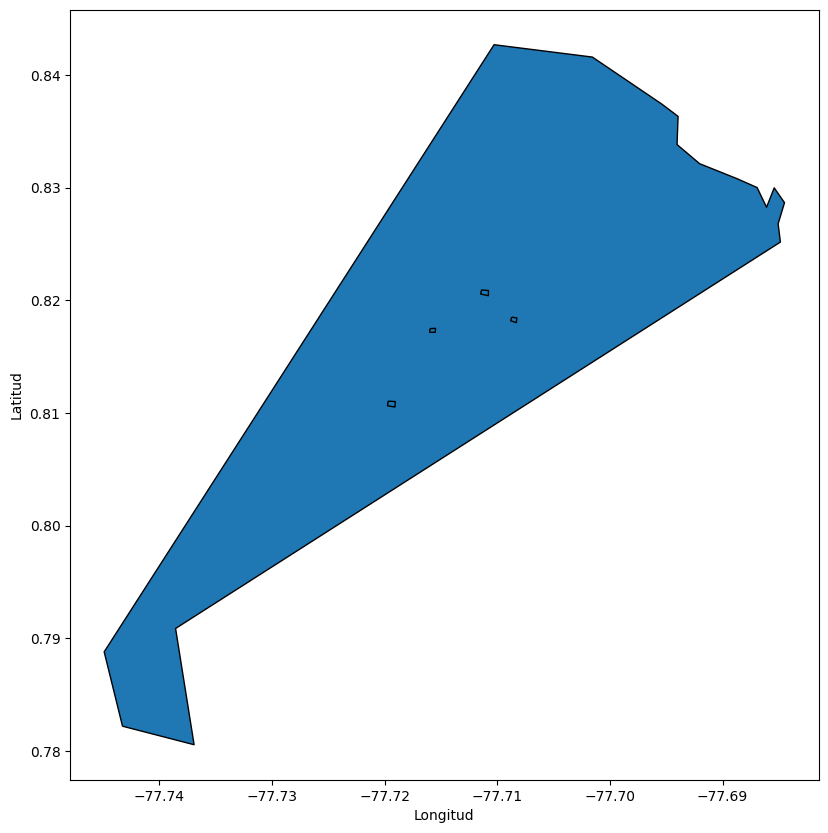

In [ ]:
region_geojson.plot(figsize=(10,10), edgecolor='black')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

In [ ]:
regiones=list(region_geojson.res.values)
print(regiones)

['Tulcán', 'Asadero_cuyes', 'Rancho_Restaurante', 'Cevicheria', 'Broster_House']


In [ ]:
#lista de adyacencia de regiones en orden alfabético
grafo_regional = [[1,2],[0,2],[0,1,3,4],
[2,4],[2,3]]
for u in range(len(grafo_regional)):
  print(regiones[u],[regiones[v] for v in grafo_regional[u]])

Tulcán ['Asadero_cuyes', 'Rancho_Restaurante']
Asadero_cuyes ['Tulcán', 'Rancho_Restaurante']
Rancho_Restaurante ['Tulcán', 'Asadero_cuyes', 'Cevicheria', 'Broster_House']
Cevicheria ['Rancho_Restaurante', 'Broster_House']
Broster_House ['Rancho_Restaurante', 'Cevicheria']


In [ ]:
!pip install ortools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 66.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.5/304.5 kB 35.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3


In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from ortools.sat.python import cp_model
#crear CSP
model = cp_model.CpModel()
#variables y dominios
color = [model.NewIntVar(1,25,'color_region_'+str(i)) for i in range(len(regiones))]
print(color)
#restricciones
for u in range(len(grafo_regional)): #para cada región u
  for v in grafo_regional[u]: #para cada vecina de u
    model.Add(color[u] != color[v]) #deben tener colores distintos
#solver
solver = cp_model.CpSolver()
status = solver.Solve(model)
c = []
if status == cp_model.OPTIMAL: #si se encuentra una solución
  for u in range(len(grafo_regional)): #para cada región
    print('Región {} ({}) de color {}'.format(u,regiones[u],solver.Value(color[u])))
    c += [solver.Value(color[u])]

[color_region_0(1..25), color_region_1(1..25), color_region_2(1..25), color_region_3(1..25), color_region_4(1..25)]
Región 0 (Tulcán) de color 5
Región 1 (Asadero_cuyes) de color 4
Región 2 (Rancho_Restaurante) de color 3
Región 3 (Cevicheria) de color 2
Región 4 (Broster_House) de color 1


In [ ]:
print('Colores de las regiones',c)
print('Cantidad de regiones',len(c))
print('Cantidad de colores de las regiones',len(set(c)),set(c))


Colores de las regiones [5, 4, 3, 2, 1]
Cantidad de regiones 5
Cantidad de colores de las regiones 5 {1, 2, 3, 4, 5}


In [31]:
colors_regiones = ['orange','cyan','green','blue','red','black']

In [32]:
from matplotlib.colors import ListedColormap
#crear mapa de color con los indices de colores encontrados por el solver
cmap = ListedColormap([colors_regiones[c[i]] for i in range(5)], name='regions')

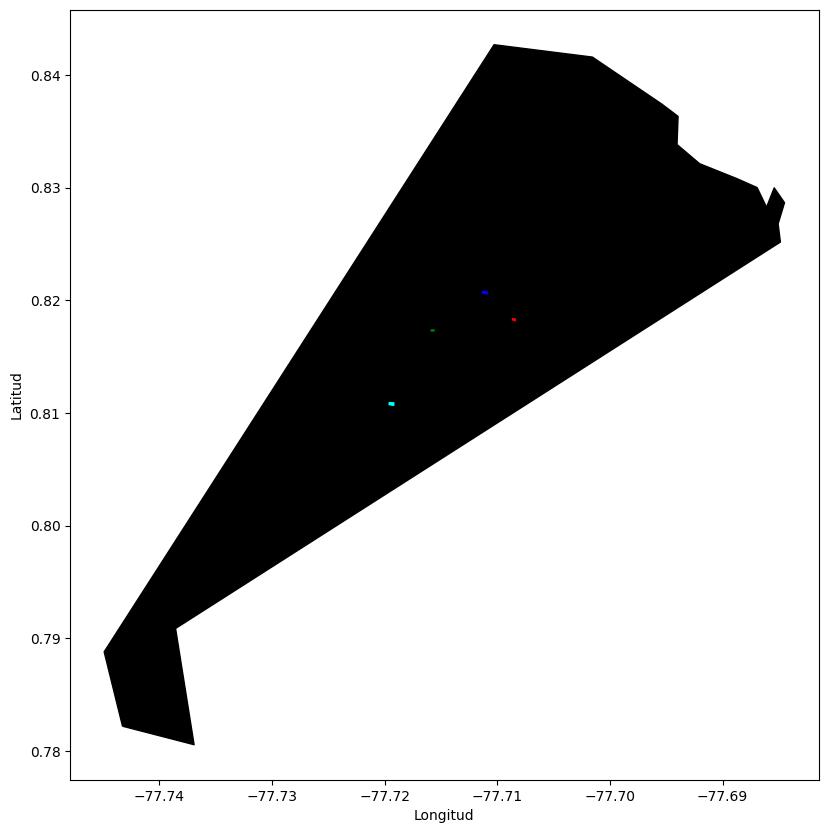

In [34]:
#plotear el geojson
region_geojson.plot(figsize=(10,10), edgecolor='black', cmap=cmap)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()